In [280]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from xgboost import XGBRegressor

df = pd.read_csv("../dataset/cars_info-australia.csv")

<h1 align='center'>Collecting Data<h1>

In [281]:
print(df.shape)
df.sample(25)

(17048, 16)


,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
11124,12821505,2021 Hyundai I30 N Pde.v4 MY22,55579,Hyundai,I30,N,Pde.v4 MY22,2021,13364,Hatchback,Automatic,Premium Unleaded Petrol,Used,1998,Black,5
15527,12844148,2012 Ford Falcon XR6T Limited Edition FG MK2,33748,Ford,Falcon,XR6T Limited Edition,FG MK2,2012,127611,Sedan,Manual,Unleaded Petrol,Used,3984,Black,5
5067,12766795,2016 Ford Everest Trend (rwd) UA MY17,41990,Ford,Everest,Trend (rwd),UA MY17,2016,109996,Wagon,Automatic,Diesel,Used,3198,Silver,7
16703,12850013,2005 Toyota Corolla Ascent ZZE122R,6999,Toyota,Corolla,Ascent,ZZE122R,2005,195454,Sedan,Automatic,Unleaded Petrol,Used,1794,Blue,5
3965,12752958,2013 Ford Kuga Trend (awd) TF,21990,Ford,Kuga,Trend (awd),TF,2013,71888,Wagon,Automatic,Premium Unleaded Petrol,Used,1596,Bronze,5
2219,12726777,2015 Jeep Cherokee Limited (4X4) KL MY16,17999,Jeep,Cherokee,Limited (4X4),KL MY16,2015,183190,Wagon,Automatic,Diesel,Used,1956,White,5
1571,12716435,2010 Volkswagen Passat 118 TSI 3C MY10 Upgrade,11500,Volkswagen,Passat,118 TSI,3C MY10 Upgrade,2010,71158,Wagon,Automatic,Premium Unleaded Petrol,Used,1798,Silver,5
1352,12712642,2012 Mitsubishi Triton GL MN MY12,13500,Mitsubishi,Triton,GL,MN MY12,2012,123052,Cab Chassis,Manual,Unleaded Petrol,Used,2351,white,3
4539,12760398,2009 Mazda 6 Limited GH,11990,Mazda,6,Limited,GH,2009,175775,Sedan,Automatic,Premium Unleaded Petrol,Used,2488,Silver,5
7777,12795256,2016 Dodge Journey R/T JC MY16,18800,Dodge,Journey,R/T,JC MY16,2016,95186,Wagon,Automatic,Premium Unleaded Petrol,Used,3604,White,5


In [282]:
drop_column = ['ID','Variant','Series','Type']

In [283]:
df.drop(columns=drop_column,inplace=True)

In [284]:
df.head()

,Name,Price,Brand,Model,Year,Kilometers,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,2010,263000,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,2021,19,Automatic,Diesel,New In Stock,2143,Black,7
2,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,2021,24,Automatic,Diesel,New In Stock,2143,Black,8
3,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,2010,120579,Automatic,Diesel,Used,2143,Black,4
4,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,2016,72506,Automatic,Unleaded Petrol,Used,1796,White,5


In [285]:
df.columns

Index(['Name', 'Price', 'Brand', 'Model', 'Year', 'Kilometers', 'Gearbox',
       'Fuel', 'Status', 'CC', 'Color', 'Seating Capacity'],
      dtype='object')

In [286]:
df = df[['Brand','Name', 'Model', 'Year', 'Kilometers', 'Gearbox',
       'Fuel', 'Status', 'CC', 'Color', 'Seating Capacity', 'Price']]

In [287]:
df.head()

,Brand,Name,Model,Year,Kilometers,Gearbox,Fuel,Status,CC,Color,Seating Capacity,Price
0,Toyota,2010 Toyota Rukus Build 2 AZE151R,Rukus,2010,263000,Automatic,Unleaded Petrol,Used,2362,Grey,5,9999
1,Mercedes-Benz,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,V,2021,19,Automatic,Diesel,New In Stock,2143,Black,7,117990
2,Mercedes-Benz,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,Valente,2021,24,Automatic,Diesel,New In Stock,2143,Black,8,79990
3,Mercedes-Benz,2010 Mercedes-Benz E250 CDI Avantgarde 207,E250,2010,120579,Automatic,Diesel,Used,2143,Black,4,34990
4,Holden,2016 Holden Cruze CD JH MY16,Cruze,2016,72506,Automatic,Unleaded Petrol,Used,1796,White,5,15990


In [288]:
columns=df.columns
columns

Index(['Brand', 'Name', 'Model', 'Year', 'Kilometers', 'Gearbox', 'Fuel',
       'Status', 'CC', 'Color', 'Seating Capacity', 'Price'],
      dtype='object')

In [289]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,brand,name,model,year,kilometers,gearbox,fuel,status,cc,color,seating_capacity,price
0,Toyota,2010 Toyota Rukus Build 2 AZE151R,Rukus,2010,263000,Automatic,Unleaded Petrol,Used,2362,Grey,5,9999
1,Mercedes-Benz,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,V,2021,19,Automatic,Diesel,New In Stock,2143,Black,7,117990
2,Mercedes-Benz,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,Valente,2021,24,Automatic,Diesel,New In Stock,2143,Black,8,79990
3,Mercedes-Benz,2010 Mercedes-Benz E250 CDI Avantgarde 207,E250,2010,120579,Automatic,Diesel,Used,2143,Black,4,34990
4,Holden,2016 Holden Cruze CD JH MY16,Cruze,2016,72506,Automatic,Unleaded Petrol,Used,1796,White,5,15990


In [290]:
df['cc'] = df['cc'].apply(lambda x : round((x/1000),1))

In [291]:
df.head()

,brand,name,model,year,kilometers,gearbox,fuel,status,cc,color,seating_capacity,price
0,Toyota,2010 Toyota Rukus Build 2 AZE151R,Rukus,2010,263000,Automatic,Unleaded Petrol,Used,2.4,Grey,5,9999
1,Mercedes-Benz,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,V,2021,19,Automatic,Diesel,New In Stock,2.1,Black,7,117990
2,Mercedes-Benz,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,Valente,2021,24,Automatic,Diesel,New In Stock,2.1,Black,8,79990
3,Mercedes-Benz,2010 Mercedes-Benz E250 CDI Avantgarde 207,E250,2010,120579,Automatic,Diesel,Used,2.1,Black,4,34990
4,Holden,2016 Holden Cruze CD JH MY16,Cruze,2016,72506,Automatic,Unleaded Petrol,Used,1.8,White,5,15990


<h1 align='center'>Cleaning Data<h1>

In [292]:
# Check N/A
df.isnull().sum()

brand               0
name                0
model               0
year                0
kilometers          0
gearbox             0
fuel                0
status              0
cc                  0
color               0
seating_capacity    0
price               0
dtype: int64

In [293]:
#Check duplicated
df.duplicated().sum()

np.int64(65)

In [294]:
df.drop_duplicates(keep='first',inplace=True)
print(df.shape)
df.duplicated().sum()

(16983, 12)


np.int64(0)

In [295]:
#Check spelling
for idx, col in enumerate(df.columns):
    print(f"{col}--> {df[col].unique()}")

brand--> ['Toyota' 'Mercedes-Benz' 'Holden' 'Nissan' 'Ford' 'BMW' 'Isuzu' 'Hyundai'
 'Volkswagen' 'Lexus' 'Mazda' 'Audi' 'Subaru' 'Mitsubishi' 'Kia' 'Skoda'
 'Renault' 'Porsche' 'Jeep' 'Honda' 'Ssangyong' 'Volvo' 'Land Rover' 'MG'
 'Suzuki' 'Ram' 'Mini' 'Jaguar' 'LDV' 'HSV' 'Alfa Romeo' 'Aston Martin'
 'Hino' 'Chrysler' 'Citroen' 'Infiniti' 'Peugeot' 'Chevrolet'
 'Lamborghini' 'Fiat' 'Bentley' 'Dodge' 'Haval' 'Great Wall' 'Abarth'
 'Foton' 'Genesis' 'GWM' 'FPV' 'Mitsubishi Fuso' 'Maserati' 'Iveco'
 'Mahindra' 'Opel' 'Saab' 'Chery' 'Smart' 'Proton' 'Cupra']
name--> ['2010 Toyota Rukus Build 2 AZE151R'
 '2021 Mercedes-Benz V 250 D Avantgarde MWB 447 MY21'
 '2021 Mercedes-Benz Valente 116 CDI MWB RWD 447 MY21' ...
 '2015 Land Rover Discovery 4 3.0 SDV6 HSE MY15'
 '2002 Holden Jackaroo SE LWB (4X4) U8'
 '2005 Toyota RAV4 Cruiser (4X4) ACA23R']
model--> ['Rukus' 'V' 'Valente' 'E250' 'Cruze' 'X-Trail' 'Territory' '325I'
 'Statesman' 'Commodore' 'D-MAX' 'Focus' 'Elantra' 'Santa FE' 'I30'
 'Ca

In [296]:
df['color']= df['color'].apply(lambda x : x.title())

In [297]:
df.head()

,brand,name,model,year,kilometers,gearbox,fuel,status,cc,color,seating_capacity,price
0,Toyota,2010 Toyota Rukus Build 2 AZE151R,Rukus,2010,263000,Automatic,Unleaded Petrol,Used,2.4,Grey,5,9999
1,Mercedes-Benz,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,V,2021,19,Automatic,Diesel,New In Stock,2.1,Black,7,117990
2,Mercedes-Benz,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,Valente,2021,24,Automatic,Diesel,New In Stock,2.1,Black,8,79990
3,Mercedes-Benz,2010 Mercedes-Benz E250 CDI Avantgarde 207,E250,2010,120579,Automatic,Diesel,Used,2.1,Black,4,34990
4,Holden,2016 Holden Cruze CD JH MY16,Cruze,2016,72506,Automatic,Unleaded Petrol,Used,1.8,White,5,15990


In [298]:
df['name'].str.replace(r'\b\d{4}\b', '', regex=True).str.strip()

0                          Toyota Rukus Build 2 AZE151R
1         Mercedes-Benz V 250 D Avantgarde MWB 447 MY21
2        Mercedes-Benz Valente 116 CDI MWB RWD 447 MY21
3                 Mercedes-Benz E250 CDI Avantgarde 207
4                               Holden Cruze CD JH MY16
                              ...                      
17043                     Holden Commodore Executive VY
17044                            Toyota Yaris YR NCP90R
17045                   Holden Jackaroo SE LWB (4X4) U8
17046                   Hyundai I30 Active GD4 Series 2
17047                  Toyota RAV4 Cruiser (4X4) ACA23R
Name: name, Length: 16983, dtype: object

In [299]:
df['name'] = df['name'].str.replace(r'\b\d{4}\b', '', regex=True).str.strip()

In [300]:
df.head()

,brand,name,model,year,kilometers,gearbox,fuel,status,cc,color,seating_capacity,price
0,Toyota,Toyota Rukus Build 2 AZE151R,Rukus,2010,263000,Automatic,Unleaded Petrol,Used,2.4,Grey,5,9999
1,Mercedes-Benz,Mercedes-Benz V 250 D Avantgarde MWB 447 MY21,V,2021,19,Automatic,Diesel,New In Stock,2.1,Black,7,117990
2,Mercedes-Benz,Mercedes-Benz Valente 116 CDI MWB RWD 447 MY21,Valente,2021,24,Automatic,Diesel,New In Stock,2.1,Black,8,79990
3,Mercedes-Benz,Mercedes-Benz E250 CDI Avantgarde 207,E250,2010,120579,Automatic,Diesel,Used,2.1,Black,4,34990
4,Holden,Holden Cruze CD JH MY16,Cruze,2016,72506,Automatic,Unleaded Petrol,Used,1.8,White,5,15990


In [301]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16983 entries, 0 to 17047
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             16983 non-null  object 
 1   name              16983 non-null  object 
 2   model             16983 non-null  object 
 3   year              16983 non-null  int64  
 4   kilometers        16983 non-null  int64  
 5   gearbox           16983 non-null  object 
 6   fuel              16983 non-null  object 
 7   status            16983 non-null  object 
 8   cc                16983 non-null  float64
 9   color             16983 non-null  object 
 10  seating_capacity  16983 non-null  int64  
 11  price             16983 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 1.7+ MB


In [302]:
df.head()

,brand,name,model,year,kilometers,gearbox,fuel,status,cc,color,seating_capacity,price
0,Toyota,Toyota Rukus Build 2 AZE151R,Rukus,2010,263000,Automatic,Unleaded Petrol,Used,2.4,Grey,5,9999
1,Mercedes-Benz,Mercedes-Benz V 250 D Avantgarde MWB 447 MY21,V,2021,19,Automatic,Diesel,New In Stock,2.1,Black,7,117990
2,Mercedes-Benz,Mercedes-Benz Valente 116 CDI MWB RWD 447 MY21,Valente,2021,24,Automatic,Diesel,New In Stock,2.1,Black,8,79990
3,Mercedes-Benz,Mercedes-Benz E250 CDI Avantgarde 207,E250,2010,120579,Automatic,Diesel,Used,2.1,Black,4,34990
4,Holden,Holden Cruze CD JH MY16,Cruze,2016,72506,Automatic,Unleaded Petrol,Used,1.8,White,5,15990


In [303]:
# Check outliers
df.describe()

,year,kilometers,cc,seating_capacity,price
count,16983.000000,1.698300e+04,16983.000000,16983.000000,16983.000000
mean,2015.468233,1.034418e+05,2.503574,5.115998,36761.137255
std,4.719444,8.038596e+04,0.887056,1.123236,30334.984257
min,1989.000000,1.000000e+00,0.900000,2.000000,1000.000000
25%,2013.000000,4.478550e+04,2.000000,5.000000,18799.500000
50%,2016.000000,8.881400e+04,2.400000,5.000000,29990.000000
75%,2019.000000,1.490330e+05,3.000000,5.000000,45990.000000
max,2022.000000,2.700000e+06,7.300000,14.000000,999000.000000


<Axes: ylabel='price'>

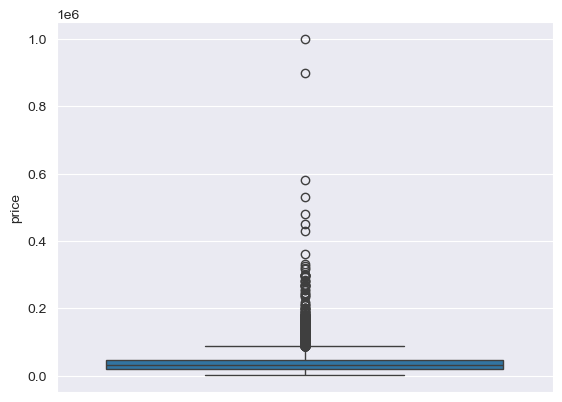

In [304]:
# Check price
sns.boxplot(y=df['price'])

In [305]:
df[df['price'] > 800000]

,brand,name,model,year,kilometers,gearbox,fuel,status,cc,color,seating_capacity,price
3253,Porsche,Porsche 911 R 991 MY16,911,2016,400,Manual,Premium Unleaded Petrol,Used,4.0,White,2,899900
4285,Porsche,Porsche 911 R 991 MY16,911,2016,3409,Manual,Premium Unleaded Petrol,Used,4.0,Black,2,999000


In [306]:
df[df['seating_capacity'] > 10]

,brand,name,model,year,kilometers,gearbox,fuel,status,cc,color,seating_capacity,price
740,Toyota,Toyota Hiace Commuter KDH223R MY15,Hiace,2016,86055,Automatic,Diesel,Used,3.0,White,14,52990
1054,Toyota,Toyota Hiace Commuter KDH223R MY12 Upgrade,Hiace,2013,70085,Automatic,Diesel,Used,3.0,White,14,49913
1288,Toyota,Toyota Hiace Commuter KDH223R MY11 Upgrade,Hiace,2012,43937,Automatic,Diesel,Used,3.0,White,14,46913
1841,Toyota,Toyota Hiace Commuter KDH223R MY14,Hiace,2014,115829,Automatic,Diesel,Used,3.0,White,14,49800
2381,Toyota,Toyota Hiace Commuter LH184R,Hiace,2004,181933,Manual,Diesel,Used,3.0,White,14,9990
2978,Toyota,Toyota Hiace Commuter TRH223R MY11 Upgrade,Hiace,2010,110315,Automatic,Unleaded Petrol,Used,2.7,White,14,34990
3838,Toyota,Toyota Landcruiser Workmate (4X4) 11 Seat VDJ78R,Landcruiser,2007,396000,Manual,Diesel,Used,4.5,White,11,39000
5548,Toyota,Toyota Hiace Commuter KDH223R MY12 Upgrade,Hiace,2014,49034,Automatic,Diesel,Used,3.0,White,14,49913
7105,Toyota,Toyota Hiace Commuter KDH223R MY14,Hiace,2015,148002,Automatic,Diesel,Used,3.0,White,14,46990
8009,Toyota,Toyota Hiace Commuter KDH223R MY16,Hiace,2017,11016,Automatic,Diesel,Used,3.0,White,14,88999


### Explore data Analysis

In [307]:
df.select_dtypes(include=['int64','float']).columns


Index(['year', 'kilometers', 'cc', 'seating_capacity', 'price'], dtype='object')

In [308]:
list_numerical = ['year', 'kilometers', 'cc', 'seating_capacity']

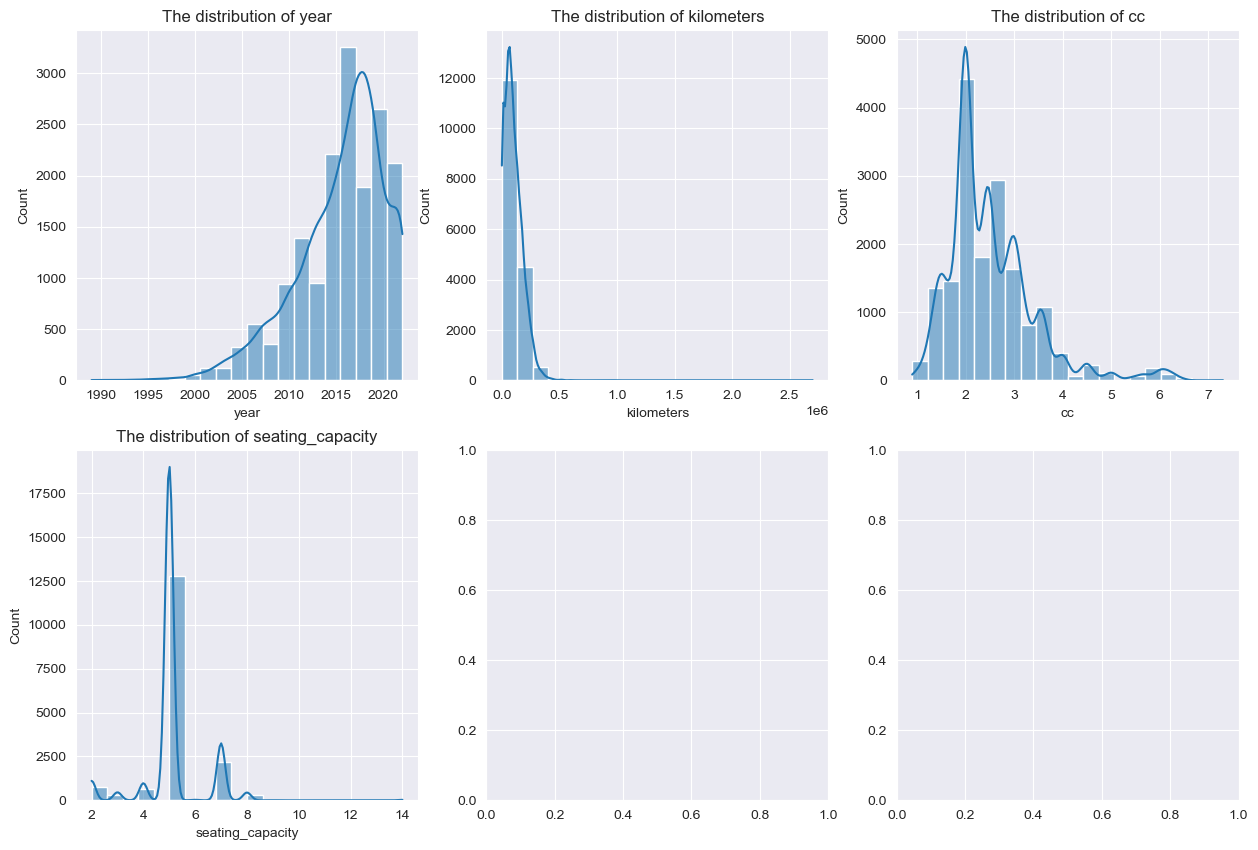

In [309]:
# Plot hist plot for numerical features
fig, axes = plt.subplots(2,3,figsize=(15,10))
axes = axes.flatten()
for idx, col in enumerate(list_numerical):
    sns.histplot(df[col],ax=axes[idx], kde=True, bins =20)
    axes[idx].set_title(f"The distribution of {col}")
plt.show()
fig.delaxes(axes[-1])

<Axes: ylabel='kilometers'>

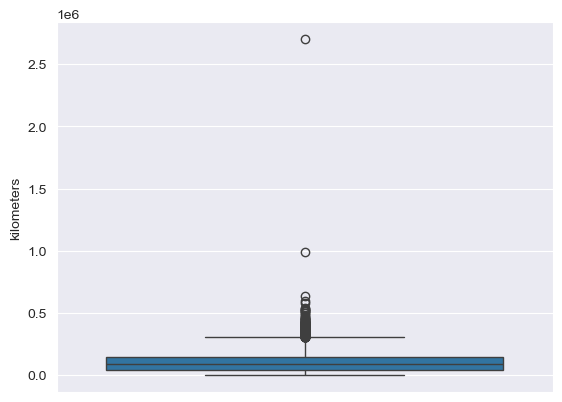

In [310]:
# check box plot for kilometer
sns.boxplot(df, y = 'kilometers')

In [311]:
df[df['kilometers'] > 2500000]

,brand,name,model,year,kilometers,gearbox,fuel,status,cc,color,seating_capacity,price
16662,Holden,Holden Rodeo LT (4X4) RA,Rodeo,2004,2700000,Manual,Unleaded Petrol,Used,3.5,White,5,11000


In [312]:
df = df[df['kilometers'] < 2500000]

<Axes: ylabel='price'>

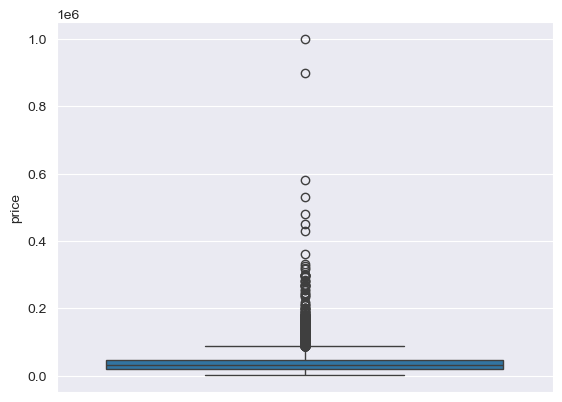

In [313]:
# check price
sns.boxplot(df, y = 'price')

In [314]:
df[df['price'] > 800000]

,brand,name,model,year,kilometers,gearbox,fuel,status,cc,color,seating_capacity,price
3253,Porsche,Porsche 911 R 991 MY16,911,2016,400,Manual,Premium Unleaded Petrol,Used,4.0,White,2,899900
4285,Porsche,Porsche 911 R 991 MY16,911,2016,3409,Manual,Premium Unleaded Petrol,Used,4.0,Black,2,999000


In [315]:
df[(df['brand'] == 'Porsche') & (df['model'] == '911')]

,brand,name,model,year,kilometers,gearbox,fuel,status,cc,color,seating_capacity,price
2797,Porsche,Porsche 911 Carrera 4 997,911,2006,48044,Manual,Premium Unleaded Petrol,Used,3.6,Grey,4,134900
3253,Porsche,Porsche 911 R 991 MY16,911,2016,400,Manual,Premium Unleaded Petrol,Used,4.0,White,2,899900
3370,Porsche,Porsche 911 Carrera GTS 991 MY19,911,2018,12248,Automatic,Premium Unleaded Petrol,Used,3.0,Grey,4,319900
4285,Porsche,Porsche 911 R 991 MY16,911,2016,3409,Manual,Premium Unleaded Petrol,Used,4.0,Black,2,999000
4600,Porsche,Porsche 911 Carrera S 991,911,2012,63006,Automatic,Premium Unleaded Petrol,Used,3.8,Silver,4,168890
5124,Porsche,Porsche 911 Carrera GTS 991 MY16,911,2015,93466,Manual,Premium Unleaded Petrol,Used,3.8,White,4,239000
5689,Porsche,Porsche 911 Carrera S 991 MY17,911,2016,59413,Automatic,Premium Unleaded Petrol,Used,3.0,Silver,4,233900
5690,Porsche,Porsche 911 Carrera GTS 997 MY11,911,2011,33991,Automatic,Premium Unleaded Petrol,Used,3.6,White,4,299900
6487,Porsche,Porsche 911 Carrera 4 S 997 MY11,911,2011,92423,Automatic,Premium Unleaded Petrol,Used,3.8,Grey,4,169900
7115,Porsche,Porsche 911 Carrera 4 S 997 MY09,911,2009,11990,Automatic,Premium Unleaded Petrol,Used,3.8,Gold,4,199900


In [316]:
price_porche_911=df[(df['brand'] == 'Porsche') & (df['model'] == '911')& (df['kilometers'] < 20000)]['price'].median()
price_porche_911

342375.0

In [317]:
df.loc[df['price'] > 800000, 'price'] = price_porche_911

In [318]:
df[df['price'] > 800000]

,brand,name,model,year,kilometers,gearbox,fuel,status,cc,color,seating_capacity,price


<h1 align='center'>Feature Engineering<h1>

In [319]:
#Check categorical features
df.head()

,brand,name,model,year,kilometers,gearbox,fuel,status,cc,color,seating_capacity,price
0,Toyota,Toyota Rukus Build 2 AZE151R,Rukus,2010,263000,Automatic,Unleaded Petrol,Used,2.4,Grey,5,9999
1,Mercedes-Benz,Mercedes-Benz V 250 D Avantgarde MWB 447 MY21,V,2021,19,Automatic,Diesel,New In Stock,2.1,Black,7,117990
2,Mercedes-Benz,Mercedes-Benz Valente 116 CDI MWB RWD 447 MY21,Valente,2021,24,Automatic,Diesel,New In Stock,2.1,Black,8,79990
3,Mercedes-Benz,Mercedes-Benz E250 CDI Avantgarde 207,E250,2010,120579,Automatic,Diesel,Used,2.1,Black,4,34990
4,Holden,Holden Cruze CD JH MY16,Cruze,2016,72506,Automatic,Unleaded Petrol,Used,1.8,White,5,15990


In [321]:
list_numerical1 = ['year', 'kilometers', 'cc', 'seating_capacity']

<Axes: >

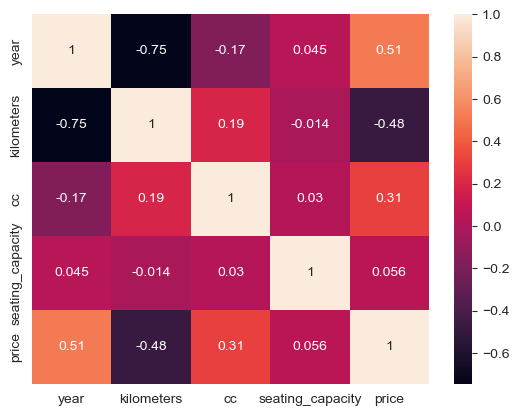

In [322]:
# Check heatmap
cm = df[['year', 'kilometers', 'cc', 'seating_capacity','price']].corr()
sns.heatmap(cm, annot=True)

In [323]:
df.drop('seating_capacity', axis=1, inplace=True)

In [324]:
list_scaler_numerical = ['year', 'kilometers', 'cc']

In [325]:
X = df.drop('price', axis=1)
y = df['price']

In [326]:
X.head()

,brand,name,model,year,kilometers,gearbox,fuel,status,cc,color
0,Toyota,Toyota Rukus Build 2 AZE151R,Rukus,2010,263000,Automatic,Unleaded Petrol,Used,2.4,Grey
1,Mercedes-Benz,Mercedes-Benz V 250 D Avantgarde MWB 447 MY21,V,2021,19,Automatic,Diesel,New In Stock,2.1,Black
2,Mercedes-Benz,Mercedes-Benz Valente 116 CDI MWB RWD 447 MY21,Valente,2021,24,Automatic,Diesel,New In Stock,2.1,Black
3,Mercedes-Benz,Mercedes-Benz E250 CDI Avantgarde 207,E250,2010,120579,Automatic,Diesel,Used,2.1,Black
4,Holden,Holden Cruze CD JH MY16,Cruze,2016,72506,Automatic,Unleaded Petrol,Used,1.8,White


In [327]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=582)

# Preprocessing
categorical_features = ['brand', 'name', 'model', 'gearbox', 'fuel', 'status', 'color']
numerical_features = ['year', 'kilometers', 'cc']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

# Training and evaluation
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2= r2_score(y_test, y_pred)
    print(f"{model_name} MSE: {mse}")
    print(f"{model_name} R2 Score: {r2}")
    print("-"*50)

Linear Regression MSE: 103806824.87832174
Linear Regression R2 Score: 0.875477695698454
--------------------------------------------------
Random Forest MSE: 69041376.07070483
Random Forest R2 Score: 0.9171808669559919
--------------------------------------------------
Gradient Boosting MSE: 113715091.64724325
Gradient Boosting R2 Score: 0.8635921553098836
--------------------------------------------------
XGBoost MSE: 60198270.334091164
XGBoost R2 Score: 0.9277886748313904
--------------------------------------------------


In [328]:
# pipeline.predict(pd.DataFrame(columns=X_train.columns, data=np.array(['Toyota','Toyota Rukus Build 2 AZE151R','Rukus',10000,'Petrol']).reshape(1,5)))

In [334]:
df.head()

,brand,name,model,year,kilometers,gearbox,fuel,status,cc,color,price
0,Toyota,Toyota Rukus Build 2 AZE151R,Rukus,2010,263000,Automatic,Unleaded Petrol,Used,2.4,Grey,9999
1,Mercedes-Benz,Mercedes-Benz V 250 D Avantgarde MWB 447 MY21,V,2021,19,Automatic,Diesel,New In Stock,2.1,Black,117990
2,Mercedes-Benz,Mercedes-Benz Valente 116 CDI MWB RWD 447 MY21,Valente,2021,24,Automatic,Diesel,New In Stock,2.1,Black,79990
3,Mercedes-Benz,Mercedes-Benz E250 CDI Avantgarde 207,E250,2010,120579,Automatic,Diesel,Used,2.1,Black,34990
4,Holden,Holden Cruze CD JH MY16,Cruze,2016,72506,Automatic,Unleaded Petrol,Used,1.8,White,15990


In [330]:
max_random = [188, 381,582]

In [331]:
# score = []
# for i in range(1000):
#     model = XGBRegressor()
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
#     pipeline.fit(X_train, y_train)
#     y_pred = pipeline.predict(X_test)
#     score.append(r2_score(y_test, y_pred))
#
# np.argmax(score)

In [335]:
from joblib import dump

dump(pipeline, "artifact/pipline.joblib")
dump(df, "artifact/df.joblib")

['artifact/df.joblib']

In [333]:
df.columns

Index(['brand', 'name', 'model', 'year', 'kilometers', 'gearbox', 'fuel',
       'status', 'cc', 'color', 'price'],
      dtype='object')

In [320]:
df[(df['brand'] == 'Toyota') & (df['model'] == 'Rukus') & (df['year'] == 2010)]

,brand,name,model,year,kilometers,gearbox,fuel,status,cc,color,seating_capacity,price
0,Toyota,Toyota Rukus Build 2 AZE151R,Rukus,2010,263000,Automatic,Unleaded Petrol,Used,2.4,Grey,5,9999
10934,Toyota,Toyota Rukus Build 1 AZE151R,Rukus,2010,278000,Automatic,Unleaded Petrol,Used,2.4,Blue,5,7988
15339,Toyota,Toyota Rukus Build 1 AZE151R,Rukus,2010,193804,Automatic,Unleaded Petrol,Used,2.4,Silver,5,12990
